In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
# Bước 1: Tải dữ liệu MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Bước 2: Tiền xử lý dữ liệu
x_train = x_train.reshape((-1, 28, 28, 1)).astype('float32') / 255.0  # chuẩn hóa và reshape
x_test = x_test.reshape((-1, 28, 28, 1)).astype('float32') / 255.0

y_train = to_categorical(y_train, 10)  # one-hot encode
y_test = to_categorical(y_test, 10)

In [4]:
# Bước 3: Xây dựng mô hình CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Lớp tích chập
    layers.MaxPooling2D((2, 2)),                                            # Lớp pooling
    layers.Conv2D(64, (3, 3), activation='relu'),                           # Lớp tích chập 2
    layers.MaxPooling2D((2, 2)),                                            # Lớp pooling 2
    layers.Flatten(),                                                       # Flatten ảnh thành vector
    layers.Dense(64, activation='relu'),                                    # Lớp ẩn fully connected
    layers.Dense(10, activation='softmax')                                  # Lớp output
])

C:\Users\quang\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Bước 4: Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Bước 5: Huấn luyện mô hình
print("Training CNN...")
history = model.fit(x_train, y_train, epochs=5, batch_size=64,
                    validation_split=0.1, verbose=1)

Training CNN...
Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.8709 - loss: 0.4316 - val_accuracy: 0.9808 - val_loss: 0.0641
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9823 - loss: 0.0593 - val_accuracy: 0.9885 - val_loss: 0.0395
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9877 - loss: 0.0392 - val_accuracy: 0.9880 - val_loss: 0.0413
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9915 - loss: 0.0268 - val_accuracy: 0.9913 - val_loss: 0.0340
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.9928 - loss: 0.0219 - val_accuracy: 0.9908 - val_loss: 0.0338


In [7]:
# Bước 6: Đánh giá mô hình
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Độ chính xác trên tập kiểm tra: {test_acc:.2f}")

Độ chính xác trên tập kiểm tra: 0.99


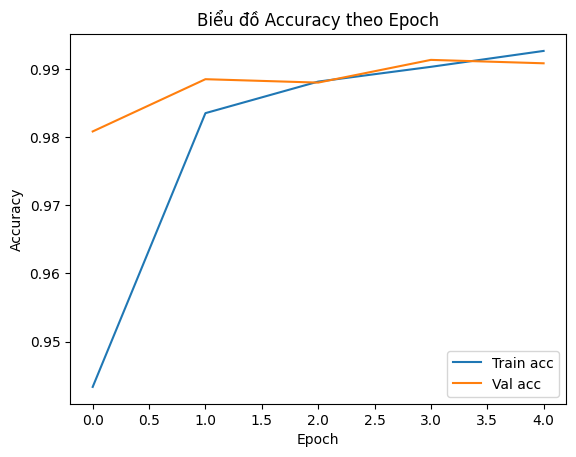

In [8]:
# Bước 7: Vẽ đồ thị accuracy và loss
plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Biểu đồ Accuracy theo Epoch')
plt.show()